In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Contours More Function
## 1. Convexity Defects
    이전에 Convex Hull을 통해 Contour Points를 모두 포함하는 볼록체에 대해 살펴보았다. 그러면서 cv2.isContourConvex 함수를 통해 Contour에 볼록 결함(Convexity Defect)가 있는지 살펴보기도 하였다. 이번에는 단순히 해당 이미지가 볼록한지 아닌지를 판단하는 것 뿐만 아니라 볼록 결함이 있는, 즉 오목한 지점의 위치를 찾아보자.
    
    cv2.convexHull 함수를 통해 해당 Contours에서 볼록한 부분을 찾을 수 있다. 필요한 인자로는 points로 2차원 포인터들의 집합을 입력으로 받으며 cv2.findContours 함수로 찾은 Contour의 인자를 주로 사용한다. 여기서 볼록 결함이 있는 부분, Convexity Defects를 찾기 위해서 필요한 인자가 하나 더 있는데 그것이 returnPoints이다.
    
    returnPoints 인자는 boolean 데이터 형태로, default로 true가 설정되어 있어 반환할 때 convex hull points를 반환한다. 하지만 false로 설정되면 이 convex hull points들이 Contours에 위치해있는 인덱스를 반환한다.
    
## cv2.convexityDefects(contour, convexhull [, convexityDefects]) → convexityDefects
    convexHull의 returnPoints를 False로 지정하여 반환받은 해당 포인터들의 인덱스를 convexityDefects의 인자로 전달해주면 된다. cv2.convexityDefects함수는 Contour의 볼록 결함을 감지하기 위한 함수로 2가지를 인자로 전달받는다.
    1. contour : convexHull을 진행했던 Contours를 그대로 인자로 받는다.
    2. convexhull : 볼록체를 만든 Contour Points의 인덱스를 포함한 convexHull를 인자로 받는다.
    
    두 함수를 인자로 받고나면, convexityDefects는 Contour의 각 인덱스마다 다음 4가지를 계산하여 반환한다.
    1. start point : Convex Hull를 이루는 시작 인덱스
    2. end point : Convex Hull를 이루기 위해 그 다음으로 연결되는 점의 인덱스
    3. farthest point : start와 end를 연결한 직선과 가장 멀리 떨어져 있는 Contour 상의 인덱스
    4. approximate distance to farthest point : farthest point와 Convex Hull 사이의 거리
    
    위 값들을 이용하여 이미지에서 오목한 부분을 시각적으로 나타낼 수 있다.

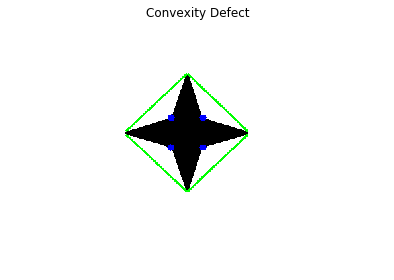

In [2]:
img = cv2.imread('bounding_rect.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
res, thr = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thr, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

cnt = contours[1]
hull_points = cv2.convexHull(cnt)
hull_index = cv2.convexHull(cnt, returnPoints=False)
defects = cv2.convexityDefects(cnt, hull_index)

for i in range(defects.shape[0]):
    sp, ep, fp, dist = defects[i][0]
    start = tuple(cnt[sp][0])
    end = tuple(cnt[ep][0])
    far = tuple(cnt[fp][0])
    cv2.line(img, start, end, (0, 255, 0), 2)
    cv2.circle(img, far, 5, (0, 0, 255), -1)

cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.imshow(img)
plt.title('Convexity Defect')
plt.axis('off')
plt.tight_layout()
plt.show()

## 2. Point Polygon Test
    이 함수는 이미지 안의 한 점과 Contour 사이의 가장 짧은 거리를 찾는 함수이다. 이미위의 한 점이 Contour 밖에 있으면 음수 값을, Contour 안에 있으면 양수 값을, Contour 위에 있으면 0을 반환한다.
    
## pointPolygonTest(contour, pt, measureDist) → retval
    이미지에서 해당 Point가 Contour의 어디에 위치해 있는지 확인하는 함수이다.
    1. contour : Contour Points들을 인자로 받는다.
    2. pt : Contour에 테스트할 Point를 인자로 받는다.
    3. measureDist : boolean 데이터 타입. 이 값이 True로 지정되면 앞서 입력받은 pt로부터 contour의 가장 가까운 경계선까지의 거리를 계산해주고, False로 지정되면 pt가 contour의 안에 위치해 있는지 아닌지만 판단하여 알려준다. (False로 지정되면 point가 contour 안에 있을 경우 1, 바깥에 위치해 있을 경우 -1, contour 경계선 위에 위치해 있으면 0을 반환한다. True로 지정되면 point가 안에 있을 경우 양수, 바깥에 있을 경우 음수, 경계선 위에 있을 경우 0을 반환한다.)

Contour에서 (70, 70)까지 거리: -144.499
Contour에서 (280, 180)까지 거리: 18.028


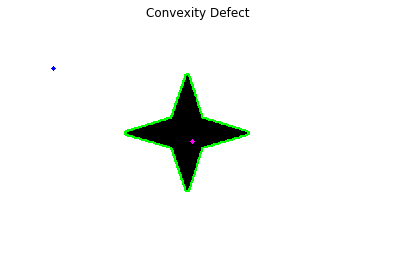

In [3]:
img = cv2.imread('bounding_rect.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
res, thr = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thr, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

cnt = contours[1]
cv2.drawContours(img, [cnt], -1, (0, 255, 0), 2)

outside = (70, 70)
inside = (280, 180)

dist1 = cv2.pointPolygonTest(cnt, outside, True)
dist2 = cv2.pointPolygonTest(cnt, inside, True)

print('Contour에서 (%d, %d)까지 거리: %.3f' %(outside[0], outside[1], dist1))
print('Contour에서 (%d, %d)까지 거리: %.3f' %(inside[0], inside[1], dist2))

cv2.circle(img, outside, 3, (0, 0, 255), -1)
cv2.circle(img, inside, 3, (255, 0, 255), -1)

cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.imshow(img)
plt.title('Convexity Defect')
plt.axis('off')
plt.tight_layout()
plt.show()

## 3. Match Shapes
    openCV에서는 2가지 객체나 Contour를 비교하여 닮은 정도를 미터법으로 계산하여 반환하는 함수 cv2.matchShapes()가 있다. 결과값이 낮으면 낮을 수록 두 객체 간 닮은 점이 많다는 뜻이다. 두 도형이 완전히 닮은 꼴이면 0을 반환한다. 이미지의 Hu Moment 값을 사용하여 계산하는데, 계산하는 방법은 method의 인자로 전달한다. (Hu Moment에 대해서 자세히 알고 싶으면 cv2.HuMoments() 혹은 위키피디아의 Image Moment 문서를 참고하면 된다.)
    
## cv2.matchShapes(contour1, contour2, method, parameter) → retval
    1. contour1 : Contour나 Grayscale 이미지를 인자로 받는다.
    2, contour2 : Contour나 Grayscale 이미지를 인자로 받는다.
    ★. method : 이미지나 Contour의 Hu Moment를 사용하여 계산한다.
        1. cv2.CONTOURS_MATCH_I1
        2. cv2.CONTOURS_MATCH_I2
        3. cv2.CONTOURS_MATCH_I3
        cv::ShapeMatchModes 참고
    4. parameter : 현재는 지원하지 않는 인자로 0.0 값을 입력한다.

cv2.CONTOURS_MATCH_I1 사용 결과 : 7 번째 인덱스,  0.042038116809640425
cv2.CONTOURS_MATCH_I2 사용 결과 : 17 번째 인덱스,  0.1454047148796117
cv2.CONTOURS_MATCH_I3 사용 결과 : 19 번째 인덱스,  0.06634568448032124


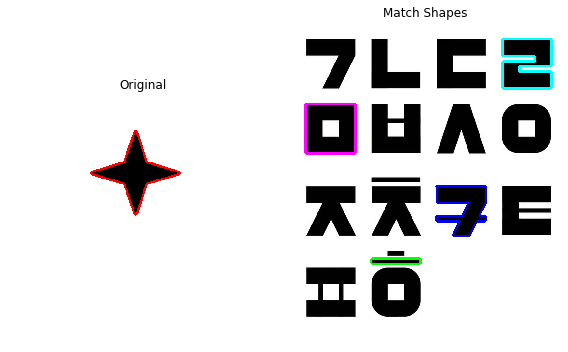

In [4]:
img = cv2.imread('bounding_rect.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
res, thr = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thr, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnt1 = contours[1]
cv2.drawContours(img, [cnt1], -1, (255, 0, 0), 3)

img2 = cv2.imread('hangul.jpg')
img_gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
res, thr2 = cv2.threshold(img_gray2, 127, 255, cv2.THRESH_BINARY)
contours2, hierarchy = cv2.findContours(thr2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

match_list1 = []
for i in range(len(contours2)):
    cnt2 = contours2[i]
    ret = cv2.matchShapes(cnt1, cnt2, cv2.CONTOURS_MATCH_I1, 0.0)
    match_list1.append(ret)

match_list2 = []
for i in range(len(contours2)):
    cnt2 = contours2[i]
    ret = cv2.matchShapes(cnt1, cnt2, cv2.CONTOURS_MATCH_I2, 0.0)
    match_list2.append(ret)
    
match_list3 = []
for i in range(len(contours2)):
    cnt2 = contours2[i]
    ret = cv2.matchShapes(cnt1, cnt2, cv2.CONTOURS_MATCH_I3, 0.0)
    match_list3.append(ret)
    
max_index = match_list1.index(max(match_list1))
min_index1 = match_list1.index(min(match_list1))
min_index2 = match_list2.index(min(match_list2))
min_index3 = match_list3.index(min(match_list3))
cv2.drawContours(img2, [contours2[max_index]], -1, (0, 255, 0), 3)    # 초록
cv2.drawContours(img2, [contours2[min_index1]], -1, (0, 0, 255), 3)   # 파랑
cv2.drawContours(img2, [contours2[min_index2]], -1, (255, 0, 255), 3) # 보라
cv2.drawContours(img2, [contours2[min_index3]], -1, (0, 255, 255), 3) # 청록
    
print("cv2.CONTOURS_MATCH_I1 사용 결과 :", min_index1, "번째 인덱스, ", min(match_list1))
print("cv2.CONTOURS_MATCH_I2 사용 결과 :", min_index2, "번째 인덱스, ", min(match_list2))
print("cv2.CONTOURS_MATCH_I3 사용 결과 :", min_index3, "번째 인덱스, ", min(match_list3))
    
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.title('Match Shapes')
plt.axis('off')
plt.tight_layout()
plt.show()